# Simple Linear Regression - Salary Data #
Use the dataset ***SLR_Data.csv*** for this exercise.


## Import relevant packages and read the data ##

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import sklearn.metrics as metrics

salary = pd.read_csv("/Users/ilhaam.ahmed/Projects/intro_data_analysis_with_pandas/Phase 3/csv files/SLR_salary.csv")


## Explore the data ##


In [34]:
salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [35]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [36]:
salary.shape

(30, 2)

In [37]:
salary.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [38]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [39]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## Plot a Scatter graph ##

Text(0.5, 1.0, 'Scatter graph showing Salary vs Years Experience')

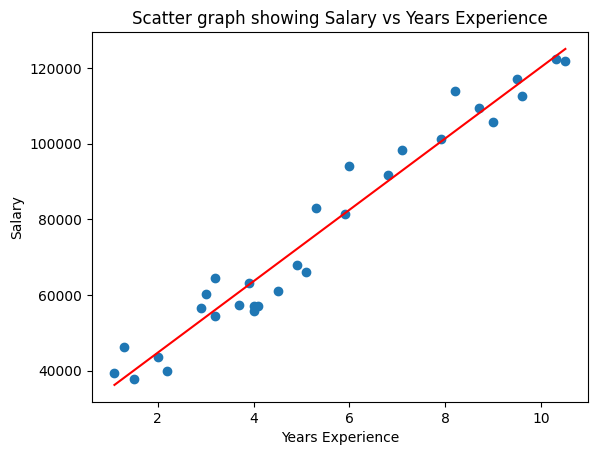

In [40]:
x_values = salary['YearsExperience']
y_values = salary['Salary']

plt.scatter(x_values, y_values)

m, c = np.polyfit(x_values, y_values, 1)
plt.plot(x_values, m * x_values + c, color='red')

plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.title("Scatter graph showing Salary vs Years Experience")

## Split the DataFrame into train and test data ##

In [41]:
train, test = train_test_split(
    salary, random_state=13
)

In [42]:
train, test

(    YearsExperience  Salary
 17              5.3   83088
 21              7.1   98273
 0               1.1   39343
 19              6.0   93940
 4               2.2   39891
 11              4.0   55794
 9               3.7   57189
 27              9.6  112635
 13              4.1   57081
 5               2.9   56642
 14              4.5   61111
 24              8.7  109431
 23              8.2  113812
 3               2.0   43525
 12              4.0   56957
 20              6.8   91738
 2               1.5   37731
 6               3.0   60150
 28             10.3  122391
 10              3.9   63218
 16              5.1   66029
 18              5.9   81363,
     YearsExperience  Salary
 22              7.9  101302
 15              4.9   67938
 26              9.5  116969
 1               1.3   46205
 25              9.0  105582
 8               3.2   64445
 7               3.2   54445
 29             10.5  121872)


 ## Train the model



OLS regression model = Ordinary Least Squares.

Step 1: Identify the independent and dependent variables, then use the add_constant function to add a column of ones to the DataFrame. 

Step 2: Build the OLS model using the following syntax:

> model = sm.OLS(<br>
&nbsp;&nbsp;&nbsp;&nbsp;DataFrame['dependent variable'],<br>
&nbsp;&nbsp;&nbsp;&nbsp;DataFrame[['independent variable 1','independent variable 2',...]]<br>
).fit()

In [43]:
dependent_var = train['Salary']
independent_var = train['YearsExperience']
independent_var = sm.add_constant(independent_var) 
#This function adds a column of ones as the first column of the 'independent_var' DataFrame


# Build the model 
model = sm.OLS(
    dependent_var,
    independent_var
).fit() #This estimates the model paramaters using the provided data


## Interpret the model results


In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     398.1
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           1.13e-14
Time:                        14:57:14   Log-Likelihood:                -221.31
No. Observations:                  22   AIC:                             446.6
Df Residuals:                      20   BIC:                             448.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.306e+04   2795.184      8.249      0.000    1.72e+04    2.89e+04
YearsExperience  9955.3660    498.963     19.952      0.000    8914.548     1.1e+04
==============================================================================
Omnibus:                        2.515   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                1.394
Skew:                           0.303   Prob(JB):                        0.498
Kurtosis:                       1.926   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Equation of the line ###

y = m*x + b

y = **9955.37**x + **23060**

y = 9955.37 * \[YearsExperience] + 23060

### Is the model 'a good fit'? ###
We can use the elements of the OLS Regression results to figure this out: <br>

- **p-value**\
Our p-value is 0.000, which is good and suggests that our data is statistically significant and that the values for our variable cannot be explained by mere coincidence.


- **R-squared**\
Our R-sqaured value is 95.2\% which is very high and suggest the data fits the model very cloesly. This is ideal but unrealistic, given that in real-world examples this will be closer to 30\%


- **F-Statistic**\
We have a high F-value which indicates that the new model is better than the old one.


- **Prob F-Statistic**\
Our probability is also very low, at 1.13e-14, showing a significant difference between the models. tHE regression model is clearly MUCH better than the base model in a statistically significant way.

## Predict data in the test set ##



In [45]:
# Use the model to predict the test data

predicted = model.predict(
    sm.add_constant(test['YearsExperience'])
)

## Is the model also 'a good fit' for our test data? ##


In [46]:
# Use r-squared on the predicted dataset to find out

metrics.r2_score(test['Salary'],predicted)

0.952797021479343

As you can seen the r-squared value is very high and almost the exact same as our train r-squared. This indicates the the model is a 'good fit' for our test data.

## Rebuild the model for the whole data set ##

In [47]:
dependent_var = salary['Salary']
independent_var = salary['YearsExperience']
independent_var = sm.add_constant(independent_var)


model = sm.OLS(
    dependent_var,
    independent_var
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           1.14e-20
Time:                        14:57:14   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Make a prediction ##

- Make a prediction for Salary with a Years Experience of 15

In [48]:
salary_pred = model.predict([1, 15])
salary_pred[0]

167541.63502049487